<a href="https://colab.research.google.com/github/alfonsorinconbarrera/alfonsorinconbarrera/blob/main/Slider_comapracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, selecciona la primera imagen:


Saving Cocuy2.jpg to Cocuy2 (2).jpg
Por favor, selecciona la segunda imagen:


Saving Cocuy1.jpg to Cocuy1 (2).jpg



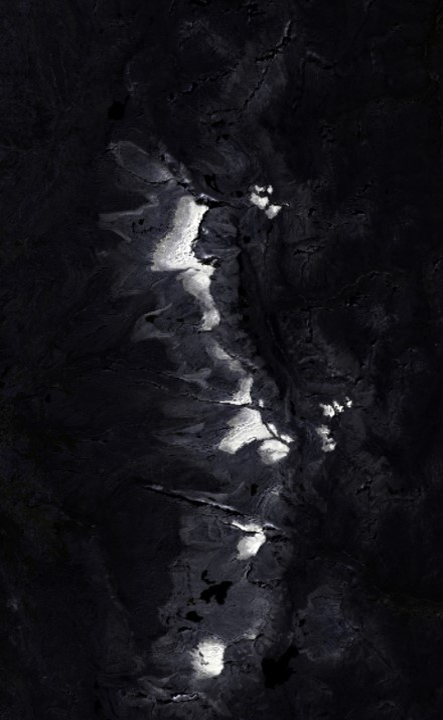
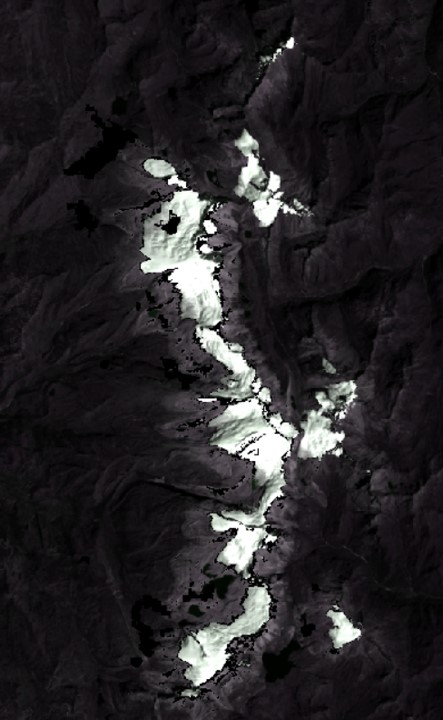

Button(button_style='primary', description='Descargar Comparador Interactivo', style=ButtonStyle(), tooltip='H…

Arrastra el slider para comparar las imágenes y haz clic en el botón para descargar el comparador como archivo HTML interactivo.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

¡Descarga completada! El archivo HTML contiene el comparador interactivo.


In [3]:
from IPython.display import display, HTML
from google.colab import files
import base64
import io
from PIL import Image
import ipywidgets as widgets

# Función para cargar imágenes
def cargar_imagenes():
    print("Por favor, selecciona la primera imagen:")
    uploaded_file1 = files.upload()
    file1_name = list(uploaded_file1.keys())[0]

    print("Por favor, selecciona la segunda imagen:")
    uploaded_file2 = files.upload()
    file2_name = list(uploaded_file2.keys())[0]

    # Abrir imágenes y ajustar tamaño si es necesario
    img1 = Image.open(io.BytesIO(uploaded_file1[file1_name]))
    img2 = Image.open(io.BytesIO(uploaded_file2[file2_name]))

    # Asegurar que ambas imágenes tienen el mismo tamaño
    width = max(img1.width, img2.width)
    height = max(img1.height, img2.height)

    img1 = img1.resize((width, height))
    img2 = img2.resize((width, height))

    # Convertir imágenes a base64 para HTML
    buffered1 = io.BytesIO()
    img1.save(buffered1, format="PNG")
    img1_base64 = base64.b64encode(buffered1.getvalue()).decode()

    buffered2 = io.BytesIO()
    img2.save(buffered2, format="PNG")
    img2_base64 = base64.b64encode(buffered2.getvalue()).decode()

    return img1_base64, img2_base64, width, height, img1, img2

# Función para mostrar el slider
def mostrar_slider(img1_base64, img2_base64, width, height):
    # Crear el código HTML para el visor de comparación
    html_code = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <meta charset="UTF-8">
        <title>Comparador de Imágenes Interactivo</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                display: flex;
                flex-direction: column;
                align-items: center;
                margin: 20px;
            }}
            h1 {{
                color: #333;
                margin-bottom: 20px;
            }}
            .slider-container {{
                position: relative;
                width: {width}px;
                height: {height}px;
                overflow: hidden;
                margin-bottom: 30px;
                box-shadow: 0 4px 8px rgba(0,0,0,0.2);
            }}
            .img-container {{
                position: absolute;
                top: 0;
                left: 0;
                width: {width/2}px;
                height: 100%;
                overflow: hidden;
            }}
            .slider {{
                position: absolute;
                top: 0;
                left: {width/2}px;
                width: 4px;
                height: 100%;
                background: #ffffff;
                pointer-events: none;
                z-index: 3;
            }}
            .slider-button {{
                position: absolute;
                left: {width/2}px;
                top: 50%;
                transform: translate(-50%, -50%);
                width: 30px;
                height: 30px;
                border-radius: 50%;
                background: white;
                cursor: pointer;
                z-index: 4;
                border: 3px solid #3366ff;
            }}
            .slider-button:before {{
                content: '↔';
                position: absolute;
                top: 50%;
                left: 50%;
                transform: translate(-50%, -50%);
                color: #3366ff;
            }}
            .instructions {{
                max-width: 600px;
                margin-bottom: 20px;
                line-height: 1.5;
                color: #555;
            }}
        </style>
    </head>
    <body>
        <h1>Comparador de Imágenes Interactivo</h1>

        <div class="instructions">
            <p>Desliza el control central para comparar las dos imágenes.
            Mueve el botón azul hacia la izquierda o derecha para revelar más de cada imagen.</p>
        </div>

        <div class="slider-container" id="slider-container">
            <img src="data:image/png;base64,{img1_base64}" style="position: absolute; width: 100%; height: 100%;">
            <div class="img-container" id="img-container">
                <img src="data:image/png;base64,{img2_base64}" style="position: absolute; width: {width}px; height: 100%;">
            </div>
            <div class="slider" id="slider"></div>
            <div class="slider-button" id="slider-button"></div>
        </div>

        <script>
            const container = document.getElementById('slider-container');
            const imgContainer = document.getElementById('img-container');
            const slider = document.getElementById('slider');
            const sliderButton = document.getElementById('slider-button');

            let isDragging = false;

            const getPosition = (event) => {{
                return event.type.includes('touch')
                    ? event.touches[0].clientX
                    : event.clientX;
            }};

            const updateSliderPosition = (clientX) => {{
                const containerRect = container.getBoundingClientRect();
                let position = clientX - containerRect.left;

                // Limitar la posición entre 0 y el ancho del contenedor
                position = Math.max(0, Math.min(position, containerRect.width));

                // Actualizar posiciones
                imgContainer.style.width = `${{position}}px`;
                slider.style.left = `${{position}}px`;
                sliderButton.style.left = `${{position}}px`;
            }};

            // Eventos para mouse
            sliderButton.addEventListener('mousedown', (e) => {{
                isDragging = true;
                e.preventDefault(); // Prevenir selección de texto
            }});

            document.addEventListener('mousemove', (e) => {{
                if (isDragging) {{
                    updateSliderPosition(getPosition(e));
                    e.preventDefault();
                }}
            }});

            document.addEventListener('mouseup', () => {{
                isDragging = false;
            }});

            // Eventos para touch (móviles)
            sliderButton.addEventListener('touchstart', (e) => {{
                isDragging = true;
                e.preventDefault();
            }});

            document.addEventListener('touchmove', (e) => {{
                if (isDragging) {{
                    updateSliderPosition(getPosition(e));
                    e.preventDefault();
                }}
            }});

            document.addEventListener('touchend', () => {{
                isDragging = false;
            }});
        </script>
    </body>
    </html>
    """

    # Mostrar el slider en Colab
    display(HTML(html_code))

    # Generar el archivo HTML descargable
    return html_code

# Función para generar y descargar archivo HTML
def descargar_html(html_content):
    # Codificar el contenido HTML a bytes
    html_bytes = html_content.encode()

    # Generar un archivo HTML temporal para descargar
    with open('comparador_interactivo.html', 'wb') as f:
        f.write(html_bytes)

    # Descargar el archivo
    files.download('comparador_interactivo.html')

# Función principal para ejecutar todo
def crear_slider_comparador():
    img1_base64, img2_base64, width, height, img1, img2 = cargar_imagenes()
    html_content = mostrar_slider(img1_base64, img2_base64, width, height)

    # Botón para descargar el archivo HTML
    download_button = widgets.Button(
        description='Descargar Comparador Interactivo',
        button_style='primary',
        tooltip='Haz clic para descargar el comparador como archivo HTML'
    )

    def on_download_button_clicked(b):
        descargar_html(html_content)
        print("¡Descarga completada! El archivo HTML contiene el comparador interactivo.")

    download_button.on_click(on_download_button_clicked)
    display(download_button)

    print("Arrastra el slider para comparar las imágenes y haz clic en el botón para descargar el comparador como archivo HTML interactivo.")

# Ejecutar la aplicación
crear_slider_comparador()